## Clase teórica 07

En esta clase y en la siguiente presentaremos algunos tableros de ejemplo de manera integral. Cada tablero fue realizado en un área distinta del análisis de datos, por lo que puede ser útil realizar un recorrido por dicho área de aplicación, para que podamos ser testigos de los múltiples contextos, industrias y escenarios en los que Power BI se convierte en una herramienta útil.

### Customer Analytics

En este apartado nos centraremos en Customer Analytics, una área fundamental dentro del análisis de datos aplicada específicamente al comportamiento y las experiencias de los clientes. Customer Analytics es el proceso de recopilar, analizar e interpretar datos relacionados con los clientes para comprender mejor sus necesidades, comportamientos y preferencias. Utiliza técnicas de análisis de datos para extraer insights que pueden mejorar la toma de decisiones estratégicas y tácticas en áreas como marketing, ventas, servicio al cliente y desarrollo de productos. Esto permite a las empresas personalizar sus ofertas, optimizar las interacciones con los clientes y mejorar la satisfacción y lealtad del cliente.

Customer analytics incluye el análisis de datos demográficos, transaccionales, de comportamiento y de feedback de clientes para obtener una visión completa y accionable sobre cómo mejorar su experiencia.

#### NPS, el KPI estrella

El **Net Promoter Score** (**NPS**) es una métrica que mide la satisfacción del cliente en relación a una empresa, producto o servicio y por eso es ampliamente utilizada en Customer Analytics. Fue desarrollado en 2003 por Fred Reichheld, un consultor de Bain & Company, en colaboración con la empresa de software Satmetrix. 

La métrica **NPS** se calcula mediante una única pregunta clave: "¿Qué tan probable es que recomiende nuestra empresa/producto/servicio a un amigo o colega?" Los clientes responden en una escala de 0 a 10. Basado en sus respuestas, los clientes se clasifican en tres categorías:

- **Promotores (puntajes de 9 a 10)**: Clientes leales y entusiastas que probablemente recomienden la empresa y contribuyan al crecimiento.

- **Neutrales (puntajes de 7 a 8)**: Clientes satisfechos pero no lo suficientemente entusiastas como para promover activamente la empresa.

- **Detractores (puntajes de 0 a 6)**: Clientes insatisfechos que pueden dañar la reputación de la empresa a través del boca a boca negativo.

Una vez recolectada la información, el **NPS** se calcula con la siguiente fórmula:

$$
\frac{(\text{Promotores} - \text{detractores})}{\text{total clientes}} * 100
$$

#### Ejemplo: Starbucks
**Tablero terminado**: _..\00.Notebooks Teoría\Tableros semana 3\Customer Analytics_

En este ejemplo visualizamos las respuestas de una encuesta de satisfacción de la conocida empresa de café Starbucks para sus sucursales de Malasia. Esta información nos permitirá conocer quiénes son los clientes, cómo son sus visitas a esta cafetería, qué opinan de distintos indicadores clave y qué tan probable es que recomienden Starbucks.


- **Modelo**

Si bien la tabla fuente es una sola, el modelo es un modelo estrella con una gran tabla central y ocho tablas satélites que fueron construidas desde la misma tabla central.

<div align="center">
   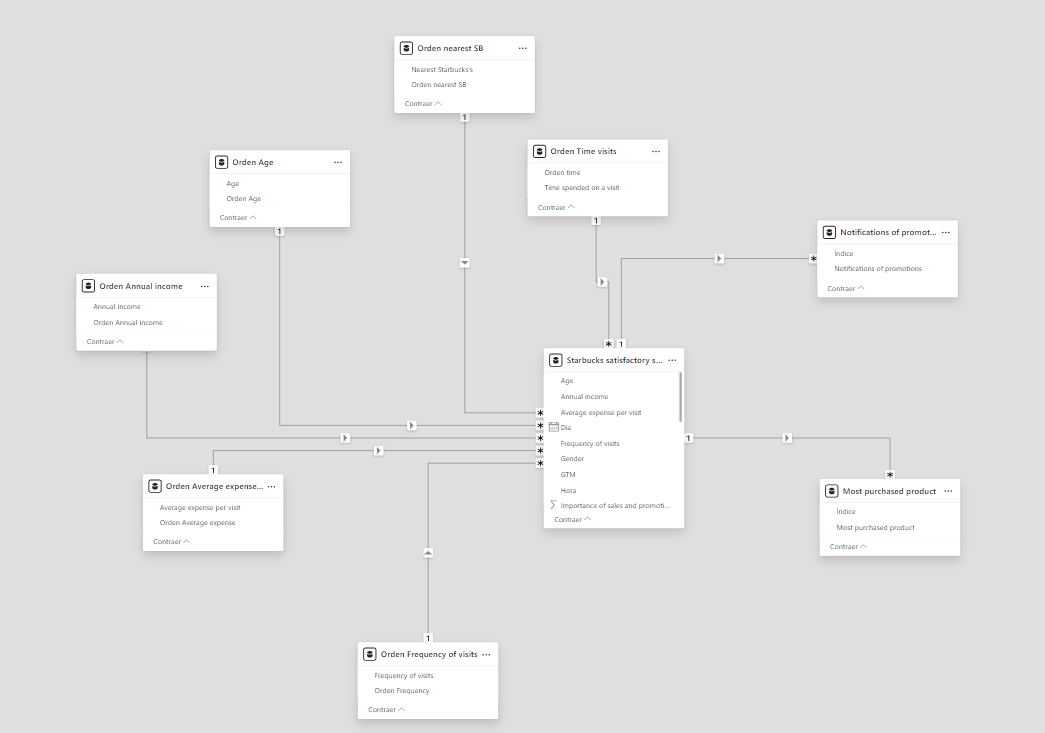
</div>

¿Por qué hicimos esto? Para responder esta pregunta dividimos las tablas en dos:

- **Creación de nuevas tablas**

Por un lado, tenemos seis tablas de “Orden”: Gran parte de las preguntas de la encuesta son de single choice con categorías que siguen cierto orden pero que no necesariamente se ve reflejado si ordenamos esas categorías alfabéticamente. Por ejemplo, frente a la pregunta por la frecuencia de visita, las opciones son: Daily, Weekly, Monthly, Rarely y Never. Si bien ese es el orden lógico (de mayor a menor frecuencia), si ordenamos alfabéticamente los términos aparecen así: Daily, Monthly, Never, Rarely y Weekly lo cual sería confuso para nuestro usuario.

Para poder ordenar las categorías de forma lógica, es necesario que creemos una tabla específica. Para hacerlo, en el editor de queries hacemos clic derecho sobre nuestra tabla original y elegimos la opción Referencia.

<div align="center">
   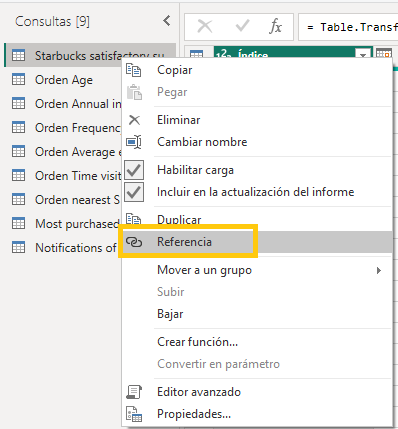
</div>

Esto nos creará automáticamente una nueva tabla a la que llamaremos Orden Frequency of visits, en la que quitaremos todas las columnas menos la que nos importa ordenar, eliminaremos los duplicados y crearemos una columna condicional donde asignemos un número a cada categoría.

<div align="center">
   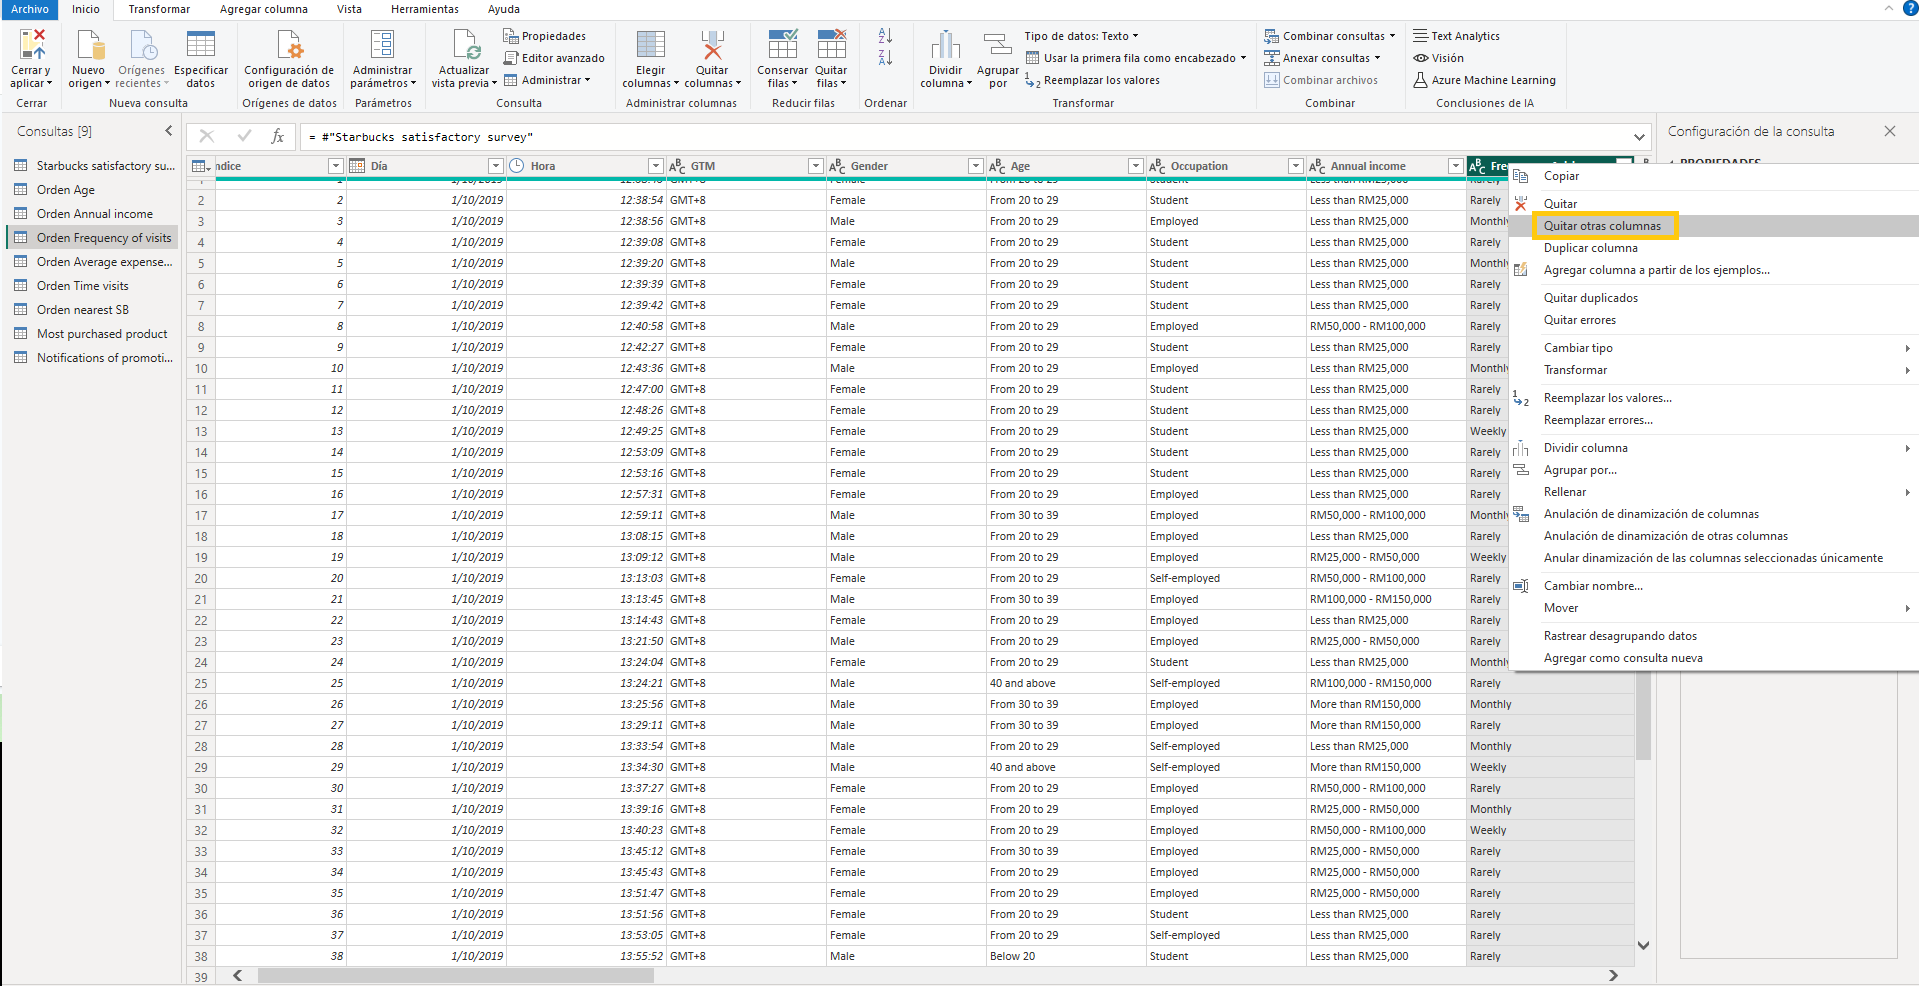
</div>

<div align="center">
   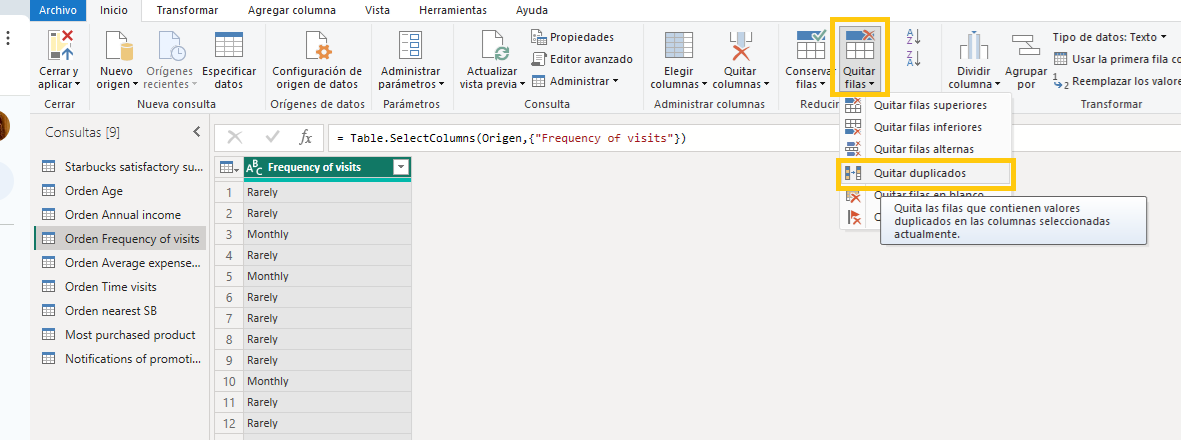
</div>

<div align="center">
   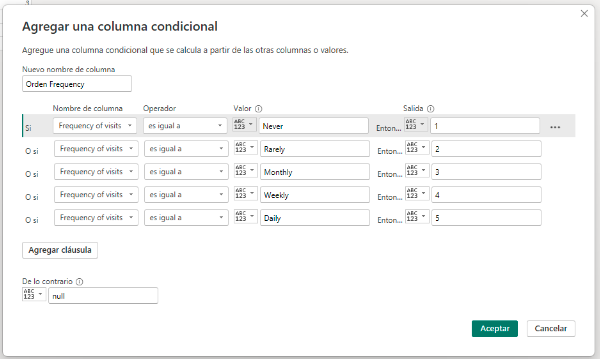
</div>

Una vez que “Cerramos y aplicamos”, solo nos queda (como vimos en clases anteriores) generar la relación entre la tabla original y la nueva (utilizando como key la columna con la que trabajamos, en este caso “Frequency of visits” y luego ordenar la columna de categorías en base a la columna de orden creada.

<div align="center">
   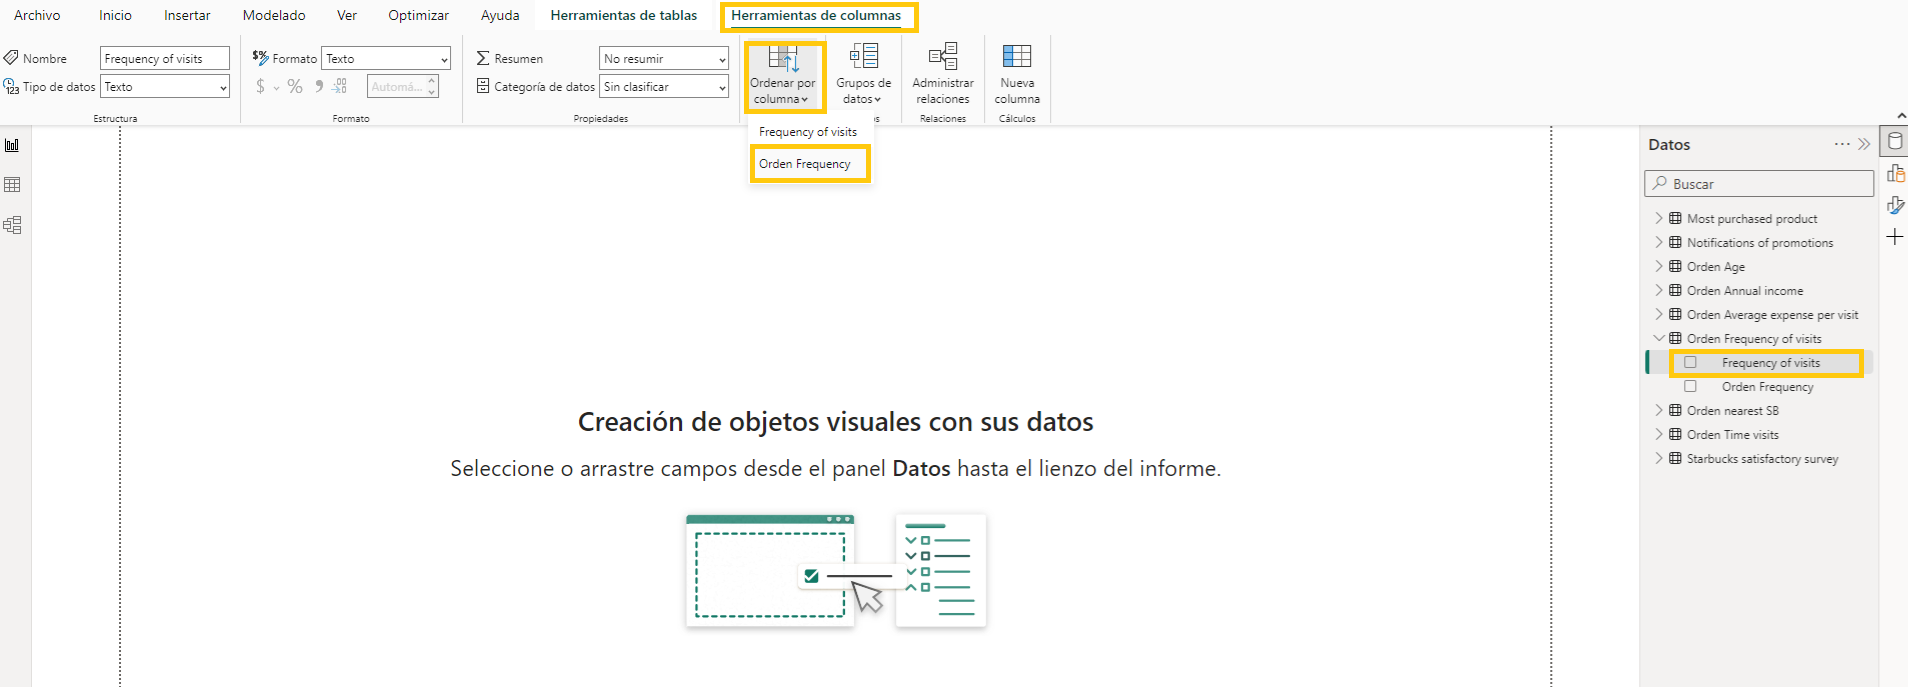
</div>

- **¿Y las otras dos tablas?**

Veremos que hay dos preguntas que en lugar de ser single choice son multiple choice. Eso hace que tengamos una o varias respuestas en una misma celda. Para poder manipular esos datos lo que hacemos es crear una tabla por cada pregunta multiple choice utilizando la opción de referencia y eliminar las columnas que no sean la columna indicada (por ejemplo, Most purchased product) e Índice. Una vez realizados estos pasos, debemos utilizar la función “Dividir columna por delimitador” y en opciones avanzadas seleccionar “Filas”

<div align="center">
   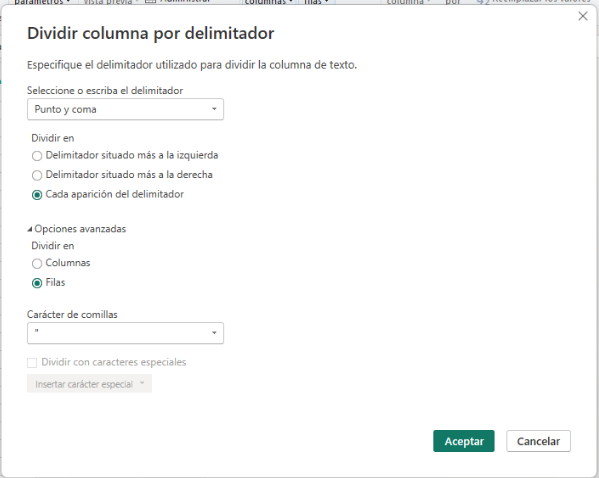
</div>

Una vez creadas, estas dos nuevas tablas se relacionarán cada una con la tabla original usando la columna Índice como key. 

- **Cálculo de NPS**
- 
Para analizar la satisfacción de nuestros clientes realizamos dos acciones clave: una en el editor de queries y otra en el tablero. 

Primero, en Power Query, vamos a crear una columna para asignar a cada cliente la categoría que corresponda a su puntaje. Si en la pregunta del NPS respondió 6 o menos será “Detractor”, 7 u 8 será “Neutral” y 9 o 10 será “Promotor”. Eso lo hacemos con una columna condicional. 

<div align="center">
   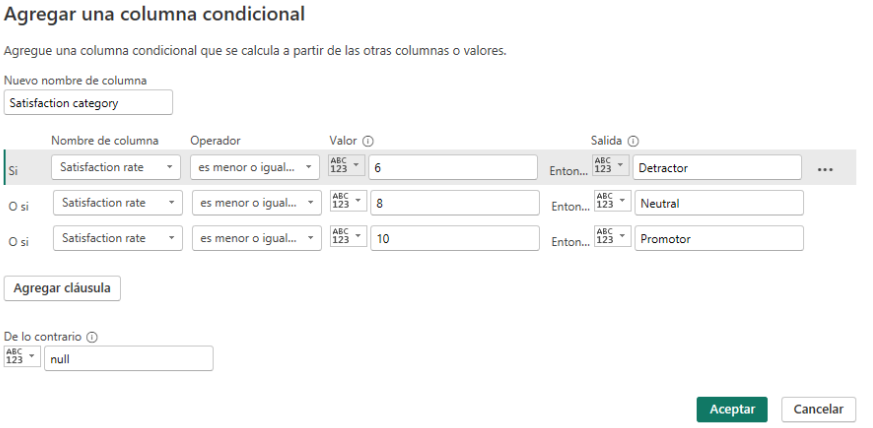
</div>

Luego tocará hacer el cálculo del **NPS**, para lo cual deberemos calcular cuántos promotores tenemos, cuántos detractores, cuántos votos totales y dividir. 

```
NPS =
Var Promotores = CALCULATE(DISTINCTCOUNT('Starbucks satisfactory survey'[Índice]),
    OR('Starbucks satisfactory survey'[Satisfaction rate] = 9, 'Starbucks satisfactory survey'[Satisfaction rate] = 10))

Var Detractores = CALCULATE(DISTINCTCOUNT('Starbucks satisfactory survey'[Índice]),
    AND(AND(AND('Starbucks satisfactory survey'[Satisfaction rate] <> 8, 'Starbucks satisfactory survey'[Satisfaction rate] <> 7), 'Starbucks satisfactory survey'[Satisfaction rate] <> 9), 'Starbucks satisfactory survey'[Satisfaction rate] <> 10))

Var Total = DISTINCTCOUNT('Starbucks satisfactory survey'[Índice])

Var Result = (Promotores-Detractores)/Total

RETURN
IF(ISBLANK(Result), "-", Result)
```

**Importante**: en este caso no hacemos la multiplicación por 100 porque ese paso se hará automáticamente al definir el formado de la métrica como “Porcentaje”.

- **Uso de variables dentro de funciones DAX**
¡La DAX del cálculo de NPS tiene más de una fórmula! 

Sí, es una fórmula DAX que utiliza variables. Estas nos sirven para realizar cálculos intermedios que luego utilizaremos para calcular un resultado final. De esta forma, las fórmulas son más fáciles de leer y mantener, además de mejorar el rendimiento. 

La estructura básica para definir y usar variables en DAX es la siguiente:

```
Nombre_medida = 
VAR nombre_variable = expresión

RETURN 
expresión_usando_variable.
```

VAR y RETURN serán palabras clave que debemos usar siempre que creemos fórmulas DAX con variables.

En el caso del cálculo de NPS, primero calculamos cuántos son los Promotores (Var Promotores), luego hacemos lo mismo con los Detractores (Var Detractores) y con el total de respuestas (Var Total).  Además, antes del RETURN creamos una última variable que llamamos “Result” donde hacemos el cálculo del NPS para poder formatearlo justamente en el último paso: Después de escribir RETURN, codeamos nuestra última fórmula que será puramente estética:  Si “Result” está en blanco, entonces queremos ver un guión, sino, queremos ver lo que haya dado Result.


- **Filtro Top N**
Otra particularidad de este tablero es que mostramos el Top 5 de canales para recibir promociones y de productos más comprados. Para poder hacer ese filtro, primero creamos el gráfico (en este caso, los campos salen de las tablas creadas específicamente para esas categorías) y veremos que al crearlo, a priori aparecen todas las categorías listadas. Para poder reducir la lista a las cinco con mayor cantidad de votos debemos seleccionar el gráfico, abrir el panel de filtros y elegir la opción “Top N”

<div align="center">
   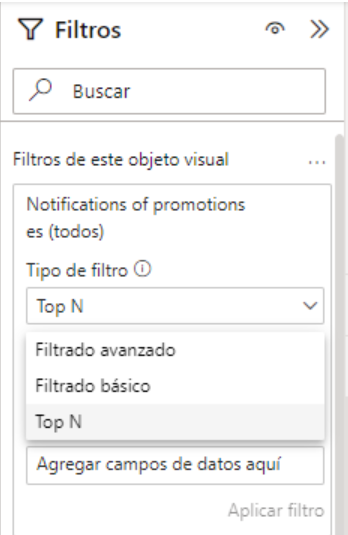
</div>

Allí nos preguntará si queremos mostrar los artículos superiores o inferiores y cuántos queremos mostrar (en este caso, elegimos superiores pero si estuviésemos analizado, por ejemplo, los productos con peor performance, elegiríamos inferiores). Luego, debemos agregar el campo por el que queremos filtrar. En este caso, agregamos el mismo campo “índice” que tenemos en el reporte y elegimos que lo muestre como “Recuento distintivo”.

<div align="center">
   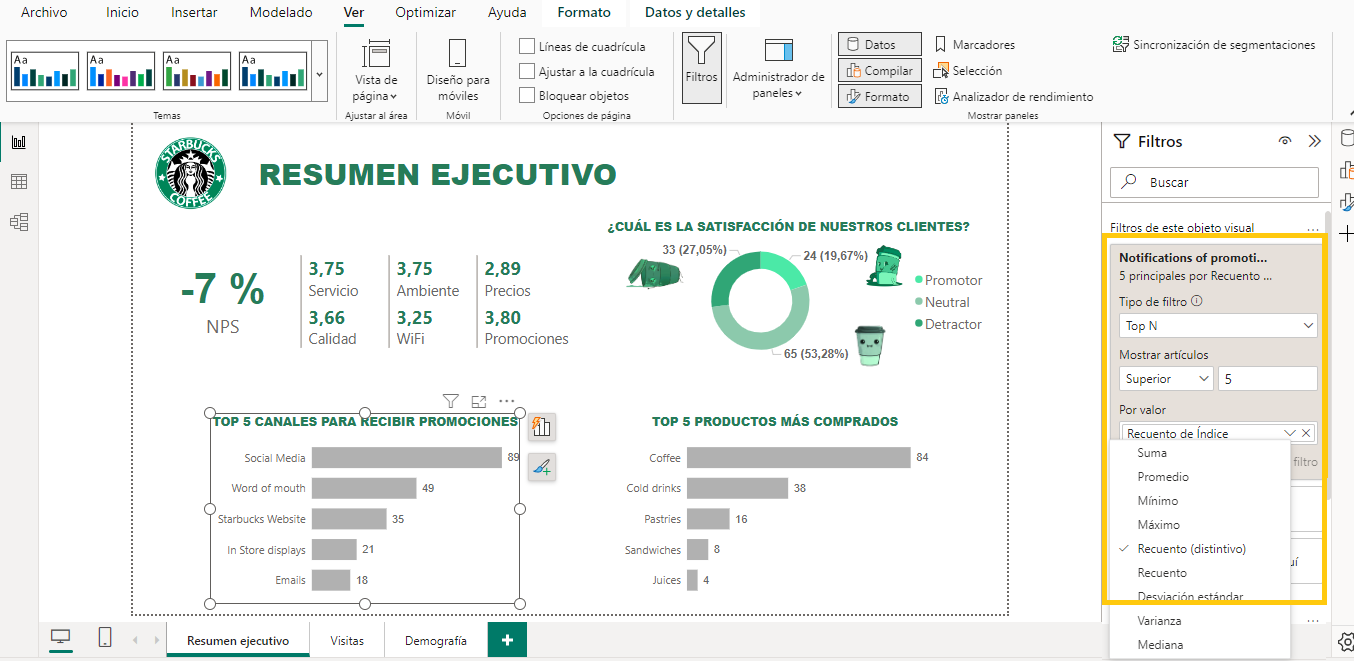
</div>

- **Seguimiento y análisis de redes sociales (Twitter)**

El área de **Social Analytics, o análisis de redes sociales**, en el mundo de Data Analytics, se centra en la recolección y el análisis de datos provenientes de plataformas sociales como Facebook, Twitter, Instagram, y LinkedIn. Utilizando técnicas de minería de datos, procesamiento del lenguaje natural y análisis de sentimientos, los profesionales pueden interpretar grandes volúmenes de datos no estructurados. Esto permite **identificar tendencias, entender el comportamiento del consumidor, medir la efectividad de campañas de marketing y gestionar la reputación en línea**. Al analizar interacciones y menciones en redes sociales, las empresas pueden obtener insights valiosos sobre la percepción de su marca y productos, facilitando la toma de decisiones informadas.

Además, Social Analytics desempeña un papel crucial en la **gestión de crisis y la optimización de estrategias de comunicación**. Al monitorear en tiempo real las conversaciones y reacciones de los usuarios, las organizaciones pueden detectar y responder rápidamente a posibles problemas o críticas, minimizando el impacto negativo. También permite **segmentar audiencias** de manera más precisa, personalizar mensajes y mejorar la experiencia del cliente. En resumen, el análisis de redes sociales no solo proporciona una comprensión profunda del entorno digital y las dinámicas sociales, sino que también impulsa la innovación y el crecimiento mediante estrategias basadas en datos.

- **KPIs más utilizados**

Algunos de los KPIs más utilizados en esta industria son:
- > **Impresiones (Alcance/Reach)**:
  
  Mide el número total de personas que han visto una publicación o campaña en redes sociales. Indica la visibilidad de los contenidos y el tamaño de la audiencia impactada.

¿Cómo se calcula?
$$
\text{Impresiones} = \text{Número total de personas que han visto la publicación}
$$

- > **Engagement**:
  
  Calcula la interacción total (me gusta, comentarios, compartidos, clics) en relación con el número de seguidores o impresiones. Evalúa el nivel de interacción y la relevancia del contenido para la audiencia.
¿Cómo se calcula?

En relación con impresiones:
$$
\text{Engagement Rate} = \frac{\text{Total de Interacciones}}{\text{Total de Impresiones}} × 100
$$
En relación con seguidores:
$$
\text{Engagement Rate} = \frac{\text{Total de Interacciones}}{\text{Total de Seguidores}} × 100
$$
- > **Tasa de Clics (Click-Through Rate - CTR)**:
  
  Mide el porcentaje de personas que hacen clic en un enlace o anuncio respecto al total de impresiones. Indica la efectividad de los llamados a la acción y el interés generado por el contenido.
$$
\text{CTR} = \frac{\text{Número total de clics}}{\text{Total de Impresiones}} × 100
$$


---

### Ejemplo: Campañas publicitarias en Twitter/X 
Tablero terminado: _..\00.Notebooks Teoría\Tableros semana 3\Social Analytics_

En este tablero podemos observar el caso de una empresa que realiza **campañas publicitarias a través de la red social Twitter o X**. En este caso puntual, se está analizando una **campaña que se desarrolló durante el año 2020 para medir su efectividad y con intención de repetirla en la actualidad**. El dashboard busca medir algunos KPIs concretos, como # de likes, # de respuestas a los tweets generados, # de retweets, # de clicks a la URL, entre otros. Además, se pueden ver gráficos que miden las impresiones a lo largo del tiempo y el engagement total por mes. En una tabla, el equipo de social analytics de la empresa busca **identificar los horarios y días de la semana en los que la campaña tuvo mayor éxito**.


- **Modelo**
  
El modelo de datos se ve de la siguiente manera:

<div align="center">
   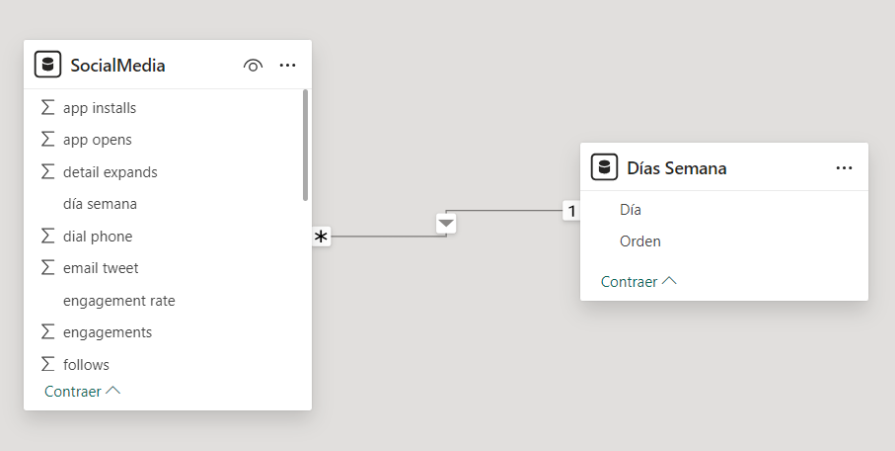
</div>

> **SocialMedia**:
Es una tabla que agrupa las principales métricas de Twitter (impresiones, likes, retweets, respuestas, clics en URL, etc.) sobre cada tweet realizado, además de contener el texto del tweet en sí mismo con su fecha.

> **Días Semana**:
Tabla auxiliar realizada especialmente para ordenar los días de la semana de lunes a domingo.


- **Cálculos y transformaciones principales**
  
- Para poder ordenar la tabla que incluye días de la semana, se incorporó una tabla de orden en conexión con el modelo de la misma forma que en el tablero anterior.
- Se transformó la variable de fecha duplicando la columna y convirtiendo a hora y día la fecha desde Power Query.
- En nuestro caso, los engagements ya venían calculados dentro de la tabla como una columna más. Para calcular el total de impresiones usamos una tarjeta → Suma de ‘Social Media’[impressions]
- Para calcular la CTR (tasa de clics) utilizamos el campo que cuenta los clics al perfil de usuario que publicó el tweet. Lo dividimos por el total de impresiones y multiplicamos el cociente por 100 para obtener una tasa. Finalmente, convertimos el tipo de dato a porcentaje.

```
CTR = DIVIDE(SUM(SocialMedia[user profile clicks]), SUM(SocialMedia[impressions])) * 100
```

- **Formato condicional**
  
Para este tablero hemos creado una tabla con formato condicional de colores, que indica los días y horarios con mayor engagement. El formato condicional se elige a partir del botón “fx”, y en este caso es del tipo “degradado”. En nuestro caso, estamos aplicando formato condicional a los elementos de celda de la tabla.

<div align="center">
   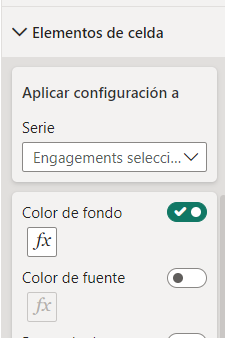
</div>

<div align="center">
   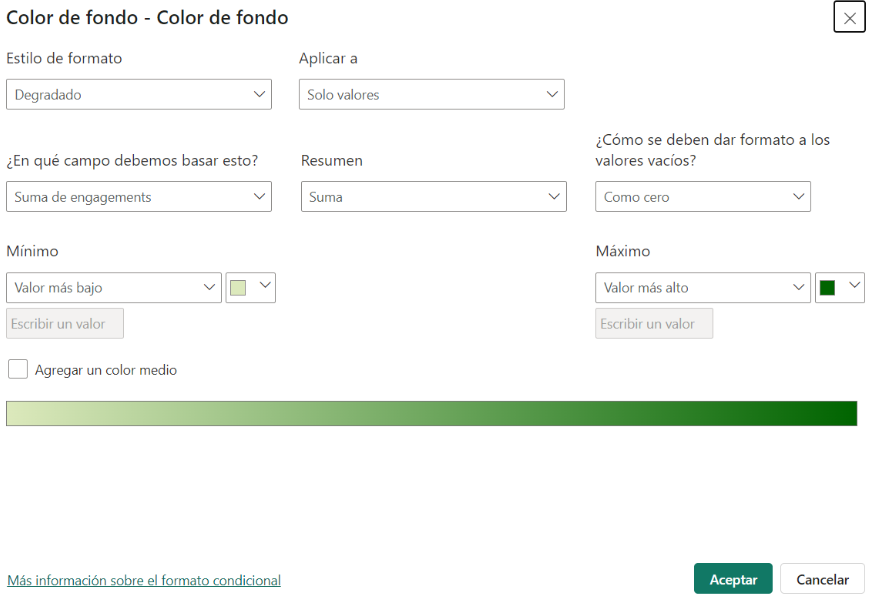
</div>

Al abrirse la ventana del formato condicional, tenemos varias opciones de estilo. Elegimos el degradado, pero también se pueden establecer reglas en base al valor de un campo o en base a una regla puntual que definimos de manera personalizada (por ejemplo, arriba de X valor la celda se pinta de un color y por debajo, de otro). Aplicamos a “Solo valores” y luego elegimos el campo en base al cual se va a establecer el degradado (debe ser un campo cuantitativo), y elegimos la medida de resumen (en nuestro caso, la suma de los engagements, pero podría ser el promedio, el recuento, etc,). Establecemos un valor mínimo y uno máximo de color y el degradado se va a configurar, la ventana incluso nos muestra la vista previa de los colores del más claro (valor más bajo) al más oscuro (destinado al máximo valor de la serie). Podemos incluso definir un color intermedio para personalizar aún más el degradado.

- **Funcionalidades**
  
    - Segmentador de fecha: para poder identificar momentos álgidos de la campaña con mayor facilidad. La fecha se limpió y formateó para no incluir horario y otros datos que no eran relevantes en este caso.
    - Encabezado con título y logo del área de social analytics.

<div align="center">
   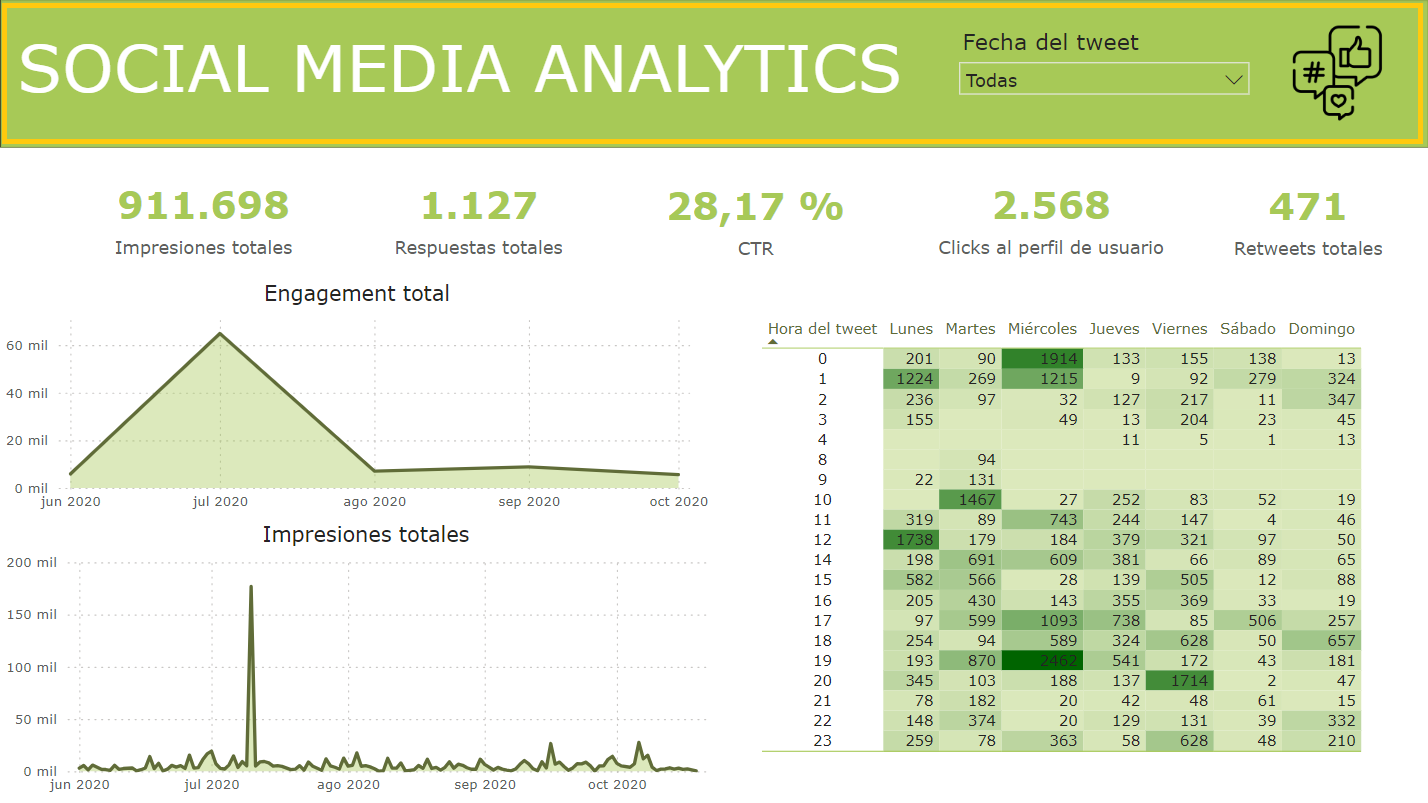
</div>

In [ ]:
##############################################################################################################################